# Problem

\begin{equation}
  - \nabla\cdot( K(u)\nabla u) = f
\end{equation}
$f=1$ is a forcing term and
the diffusion tensor is
\begin{equation}
  K(u) = (\epsilon^2 + |\nabla u|^2)^{\frac{p-2}{2}},
\end{equation}
with $\epsilon$ being a small positive number.
On the boundary we prescribe Dirichlet conditions $g=0$.

We solve this problem in variational form
\begin{align*}
\int_{\Omega} K(u) \nabla u \cdot \nabla v \; dx &= \int_{\Omega} f v\; dx.
\end{align*}
on a domain $\Omega=[0,1]^2$.

Some basic imports.

In [ ]:
import numpy as np
import dune
from dune.grid import cartesianDomain
from dune.alugrid import aluConformGrid as leafGridView
from dune.fem.space import lagrange
from dune.fem.scheme import galerkin as solutionScheme
from dune.fem import integrate

Setup grid for domain $\Omega=[0,1]^2$ and space a linear Lagrange space.

In [1]:
##### TASK
grid = leafGridView(cartesianDomain([0,0],[1,1],[10,10]))
space = lagrange(grid, order=1)

NameError: name 'leafGridView' is not defined

Import UFL variables and define spatial coordinate, test/trial function

In [ ]:
##### TASK
import ufl

x = ufl.SpatialCoordinate(space)
u = ufl.TrialFunction(space)
v = ufl.TestFunction(space)

Define a discrete function $u_h$.
We also define constants for $\epsilon$, $p$, $f$, and $g$.
These can used as floats in ufl expressions but can be
changed at a later stage without requiring any recompilation.

In [ ]:
##### TASK
eps = dune.ufl.Constant(1E-5)
f = dune.ufl.Constant(1)
g = dune.ufl.Constant(0)
p = dune.ufl.Constant(1)
u_h = space.interpolate(1, name="solution")

Define a function $K(u)$ and $\epsilon = 10^{-5}$.
Note that $|\nabla u|^2$ should be written as `inner( grad(u), grad(u) )` in ufl.
Also define the weak from given above.

In [ ]:
##### TASK
K = (eps**2 + ufl.inner(ufl.grad(u), ufl.grad(u)))**((p-2)/2)
a = K * ufl.inner(ufl.grad(u), ufl.grad(v)) * ufl.dx - f * v * ufl.dx

Then we define a scheme and we use Dirichlet boundary conditions described by
$g$.

In [ ]:

parameters = { "nonlinear.tolerance": 1e-6, # tolerance for nonlinear solver
               "nonlinear.forcing": "eisenstatwalker",
               #"nonlinear.forcing": "none",
               #"linear.errormeasure": "residualreduction",
               #"linear.errormeasure": "relative",
               "linear.tolerance": 1e-10, # given by forcing
             }

dbc = dune.ufl.DirichletBC(space, g)

scheme = solutionScheme([a == 0, dbc], solver='cg', parameters=parameters)



Call solve and store the result in $u_h$.
Plot the result.

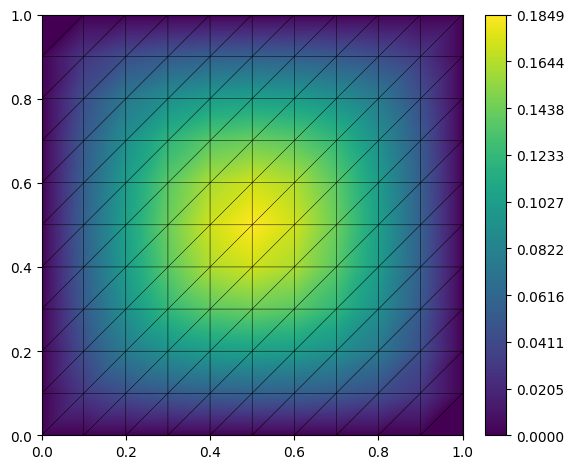

In [ ]:
##### TASK
p.value = 3
g.value = 0
f.value = 1
scheme.solve(target=u_h)
u_h.plot()